In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import random as rand
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel as W, ExpSineSquared as ExpSS, DotProduct as DP, Matern as Mt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import warnings
warnings.filterwarnings("ignore")

# daily stock data plot

In [2]:
df_daily=pd.read_csv('AAPL_parent_daily.csv')
df_daily

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2013,19.779285,19.821428,19.343929,19.608213,16.837118,560518000
1,03-01-2013,19.567142,19.631071,19.321428,19.360714,16.624596,352965200
2,04-01-2013,19.177500,19.236786,18.779642,18.821428,16.161518,594333600
3,07-01-2013,18.642857,18.903570,18.400000,18.710714,16.066458,484156400
4,08-01-2013,18.900356,18.996071,18.616072,18.761070,16.109694,458707200
...,...,...,...,...,...,...,...
2567,15-03-2023,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
2568,16-03-2023,152.160004,156.460007,151.639999,155.850006,155.850006,76161100
2569,17-03-2023,156.080002,156.740005,154.279999,155.000000,155.000000,98862500
2570,20-03-2023,155.070007,157.820007,154.149994,157.399994,157.399994,73641400


In [3]:
df_daily = df_daily.assign(Avg_price=lambda x: ((x['Open'] + x['High'] + x['Low'] + x['Close'])/4))

In [4]:
df_daily

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,02-01-2013,19.779285,19.821428,19.343929,19.608213,16.837118,560518000,19.638214
1,03-01-2013,19.567142,19.631071,19.321428,19.360714,16.624596,352965200,19.470089
2,04-01-2013,19.177500,19.236786,18.779642,18.821428,16.161518,594333600,19.003839
3,07-01-2013,18.642857,18.903570,18.400000,18.710714,16.066458,484156400,18.664285
4,08-01-2013,18.900356,18.996071,18.616072,18.761070,16.109694,458707200,18.818392
...,...,...,...,...,...,...,...,...
2567,15-03-2023,151.190002,153.250000,149.919998,152.990005,152.990005,77167900,151.837501
2568,16-03-2023,152.160004,156.460007,151.639999,155.850006,155.850006,76161100,154.027504
2569,17-03-2023,156.080002,156.740005,154.279999,155.000000,155.000000,98862500,155.525002
2570,20-03-2023,155.070007,157.820007,154.149994,157.399994,157.399994,73641400,156.110001


In [5]:
start=1
df_daily.insert(0, 'Day', range(start, start + df_daily.shape[0]))

In [6]:
df_daily

,Day,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,1,02-01-2013,19.779285,19.821428,19.343929,19.608213,16.837118,560518000,19.638214
1,2,03-01-2013,19.567142,19.631071,19.321428,19.360714,16.624596,352965200,19.470089
2,3,04-01-2013,19.177500,19.236786,18.779642,18.821428,16.161518,594333600,19.003839
3,4,07-01-2013,18.642857,18.903570,18.400000,18.710714,16.066458,484156400,18.664285
4,5,08-01-2013,18.900356,18.996071,18.616072,18.761070,16.109694,458707200,18.818392
...,...,...,...,...,...,...,...,...,...
2567,2568,15-03-2023,151.190002,153.250000,149.919998,152.990005,152.990005,77167900,151.837501
2568,2569,16-03-2023,152.160004,156.460007,151.639999,155.850006,155.850006,76161100,154.027504
2569,2570,17-03-2023,156.080002,156.740005,154.279999,155.000000,155.000000,98862500,155.525002
2570,2571,20-03-2023,155.070007,157.820007,154.149994,157.399994,157.399994,73641400,156.110001


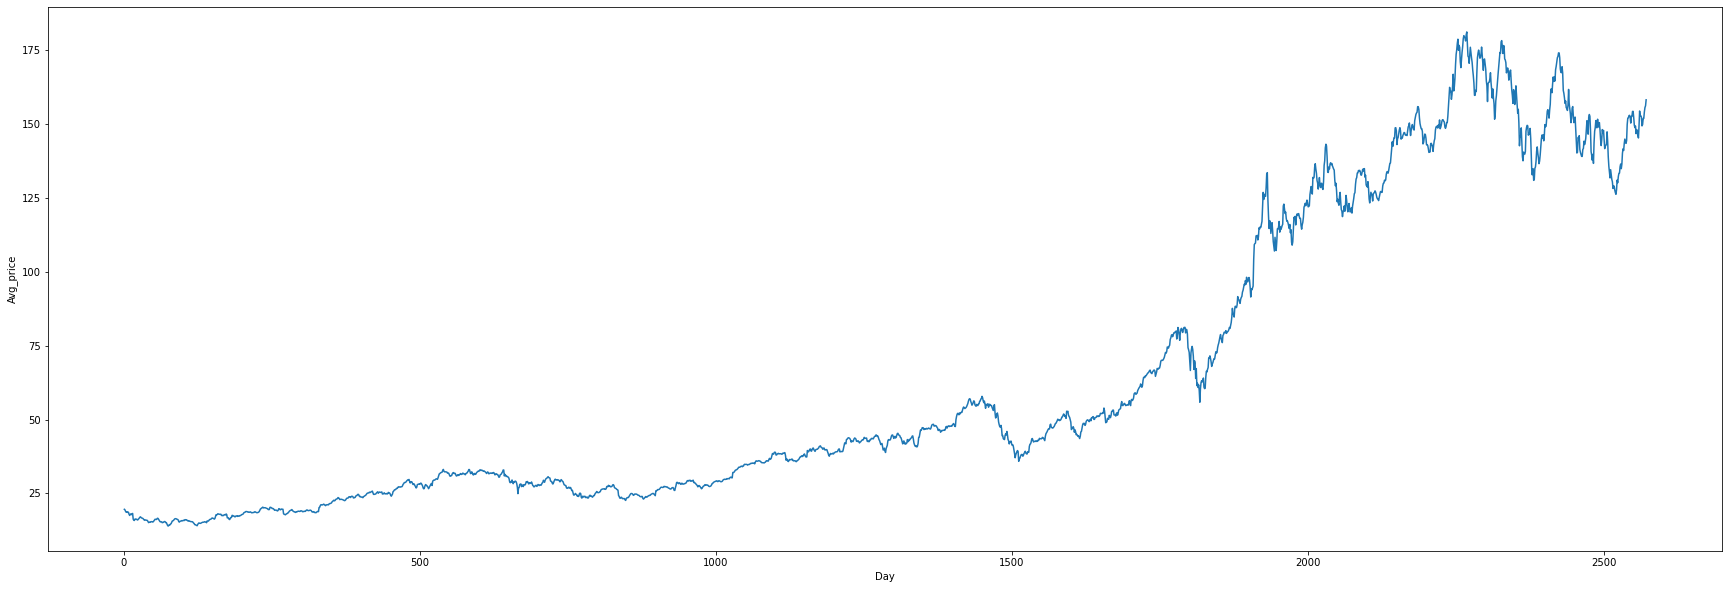

In [7]:
plt.figure(figsize=(30,10))
sns.lineplot(x="Day", y="Avg_price", data=df_daily)
plt.show()

# weekly stock data plot

In [8]:
df_weekly=pd.read_csv('AAPL_parent_weekly.csv')
df_weekly

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,19.779285,19.821428,18.400000,18.710714,16.066452,1991973200
1,2013-01-08,18.900356,18.996071,17.803928,17.919643,15.387178,2552172000
2,2013-01-15,17.796429,18.241072,17.263571,17.857143,15.333515,2494178400
3,2013-01-22,18.020000,18.392500,15.535714,16.065357,13.794949,4777452400
4,2013-01-29,16.375000,16.521429,15.785714,15.797143,13.564637,2324249200
...,...,...,...,...,...,...,...
529,2023-02-21,150.199997,151.300003,145.720001,147.919998,147.919998,258740800
530,2023-02-28,147.050003,156.300003,143.899994,153.830002,153.830002,316490600
531,2023-03-07,153.699997,154.539993,147.610001,150.470001,150.470001,310201900
532,2023-03-14,151.279999,157.820007,149.919998,157.399994,157.399994,399528800


In [9]:
df_weekly = df_weekly.assign(Avg_price=lambda x: ((x['Open'] + x['High'] + x['Low'] + x['Close'])/4))
df_weekly

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,2013-01-01,19.779285,19.821428,18.400000,18.710714,16.066452,1991973200,19.177857
1,2013-01-08,18.900356,18.996071,17.803928,17.919643,15.387178,2552172000,18.405000
2,2013-01-15,17.796429,18.241072,17.263571,17.857143,15.333515,2494178400,17.789554
3,2013-01-22,18.020000,18.392500,15.535714,16.065357,13.794949,4777452400,17.003393
4,2013-01-29,16.375000,16.521429,15.785714,15.797143,13.564637,2324249200,16.119822
...,...,...,...,...,...,...,...,...
529,2023-02-21,150.199997,151.300003,145.720001,147.919998,147.919998,258740800,148.785000
530,2023-02-28,147.050003,156.300003,143.899994,153.830002,153.830002,316490600,150.270001
531,2023-03-07,153.699997,154.539993,147.610001,150.470001,150.470001,310201900,151.579998
532,2023-03-14,151.279999,157.820007,149.919998,157.399994,157.399994,399528800,154.104999


In [10]:
start=1
df_weekly.insert(0, 'Week', range(start, start + df_weekly.shape[0]))
df_weekly

,Week,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,1,2013-01-01,19.779285,19.821428,18.400000,18.710714,16.066452,1991973200,19.177857
1,2,2013-01-08,18.900356,18.996071,17.803928,17.919643,15.387178,2552172000,18.405000
2,3,2013-01-15,17.796429,18.241072,17.263571,17.857143,15.333515,2494178400,17.789554
3,4,2013-01-22,18.020000,18.392500,15.535714,16.065357,13.794949,4777452400,17.003393
4,5,2013-01-29,16.375000,16.521429,15.785714,15.797143,13.564637,2324249200,16.119822
...,...,...,...,...,...,...,...,...,...
529,530,2023-02-21,150.199997,151.300003,145.720001,147.919998,147.919998,258740800,148.785000
530,531,2023-02-28,147.050003,156.300003,143.899994,153.830002,153.830002,316490600,150.270001
531,532,2023-03-07,153.699997,154.539993,147.610001,150.470001,150.470001,310201900,151.579998
532,533,2023-03-14,151.279999,157.820007,149.919998,157.399994,157.399994,399528800,154.104999


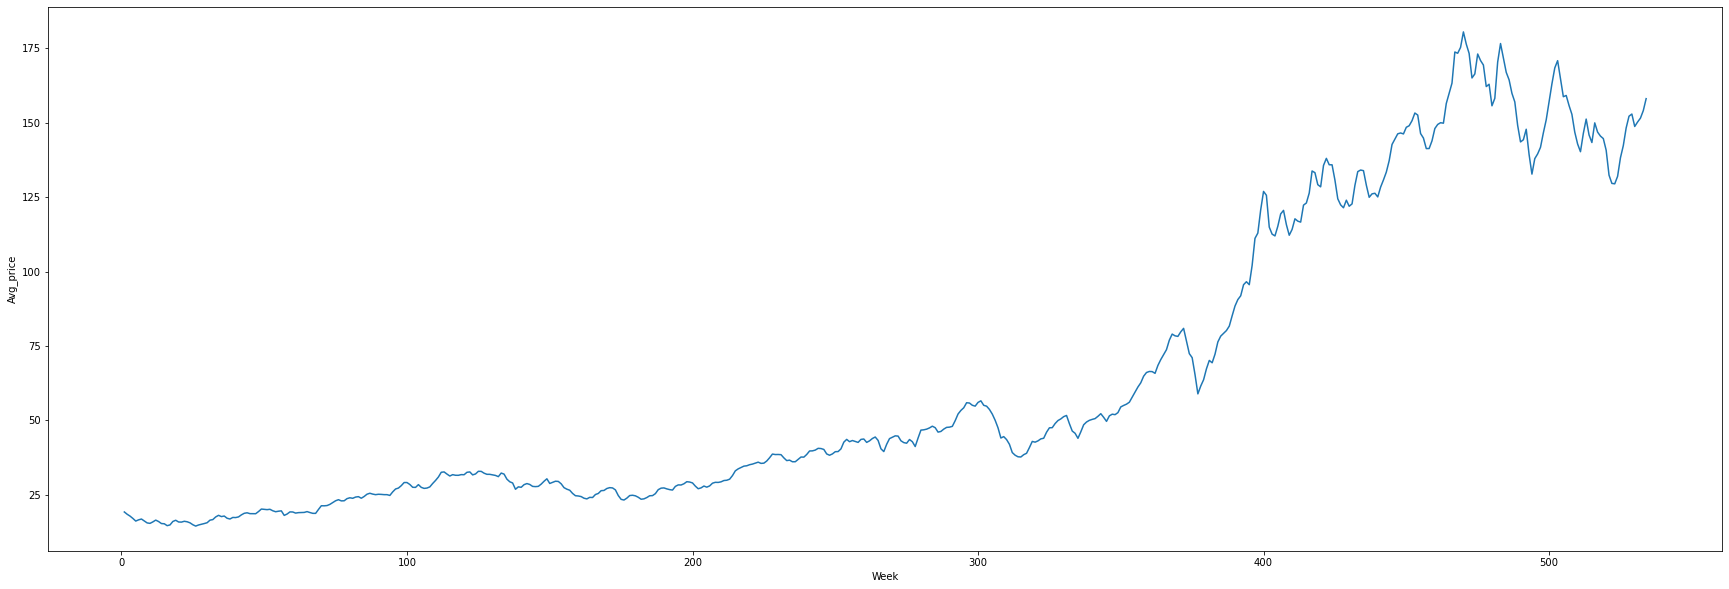

In [11]:
plt.figure(figsize=(30,10))
sns.lineplot(x="Week", y="Avg_price", data=df_weekly)
plt.show()

# monthly stock data plot

In [12]:
df_monthly=pd.read_csv('AAPL_parent_monthly.csv')
df_monthly

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,19.779285,19.821428,15.535714,16.267500,13.968525,13123423600
1,2013-02-01,16.396786,17.319286,15.630714,15.764286,13.536427,9344034000
2,2013-03-01,15.642857,16.783930,14.964286,15.809286,13.654184,9176876800
3,2013-04-01,15.782143,15.901786,13.753571,15.813571,13.657885,10963489600
4,2013-05-01,15.873571,16.633928,14.960714,16.061787,13.872264,9447530400
...,...,...,...,...,...,...,...
119,2022-12-01,148.210007,150.919998,125.870003,129.929993,129.731918,1675731200
120,2023-01-01,130.279999,147.229996,124.169998,144.289993,144.070023,1443652500
121,2023-02-01,143.970001,157.380005,141.320007,147.410004,147.185272,1307198900
122,2023-03-01,146.830002,159.399994,143.899994,159.279999,159.279999,1049543200


In [13]:
df_monthly = df_monthly.assign(Avg_price=lambda x: ((x['Open'] + x['High'] + x['Low'] + x['Close'])/4))
start=1
df_monthly.insert(0, 'Month', range(start, start + df_monthly.shape[0]))
df_monthly

,Month,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,1,2013-01-01,19.779285,19.821428,15.535714,16.267500,13.968525,13123423600,17.850982
1,2,2013-02-01,16.396786,17.319286,15.630714,15.764286,13.536427,9344034000,16.277768
2,3,2013-03-01,15.642857,16.783930,14.964286,15.809286,13.654184,9176876800,15.800090
3,4,2013-04-01,15.782143,15.901786,13.753571,15.813571,13.657885,10963489600,15.312768
4,5,2013-05-01,15.873571,16.633928,14.960714,16.061787,13.872264,9447530400,15.882500
...,...,...,...,...,...,...,...,...,...
119,120,2022-12-01,148.210007,150.919998,125.870003,129.929993,129.731918,1675731200,138.732500
120,121,2023-01-01,130.279999,147.229996,124.169998,144.289993,144.070023,1443652500,136.492497
121,122,2023-02-01,143.970001,157.380005,141.320007,147.410004,147.185272,1307198900,147.520004
122,123,2023-03-01,146.830002,159.399994,143.899994,159.279999,159.279999,1049543200,152.352497


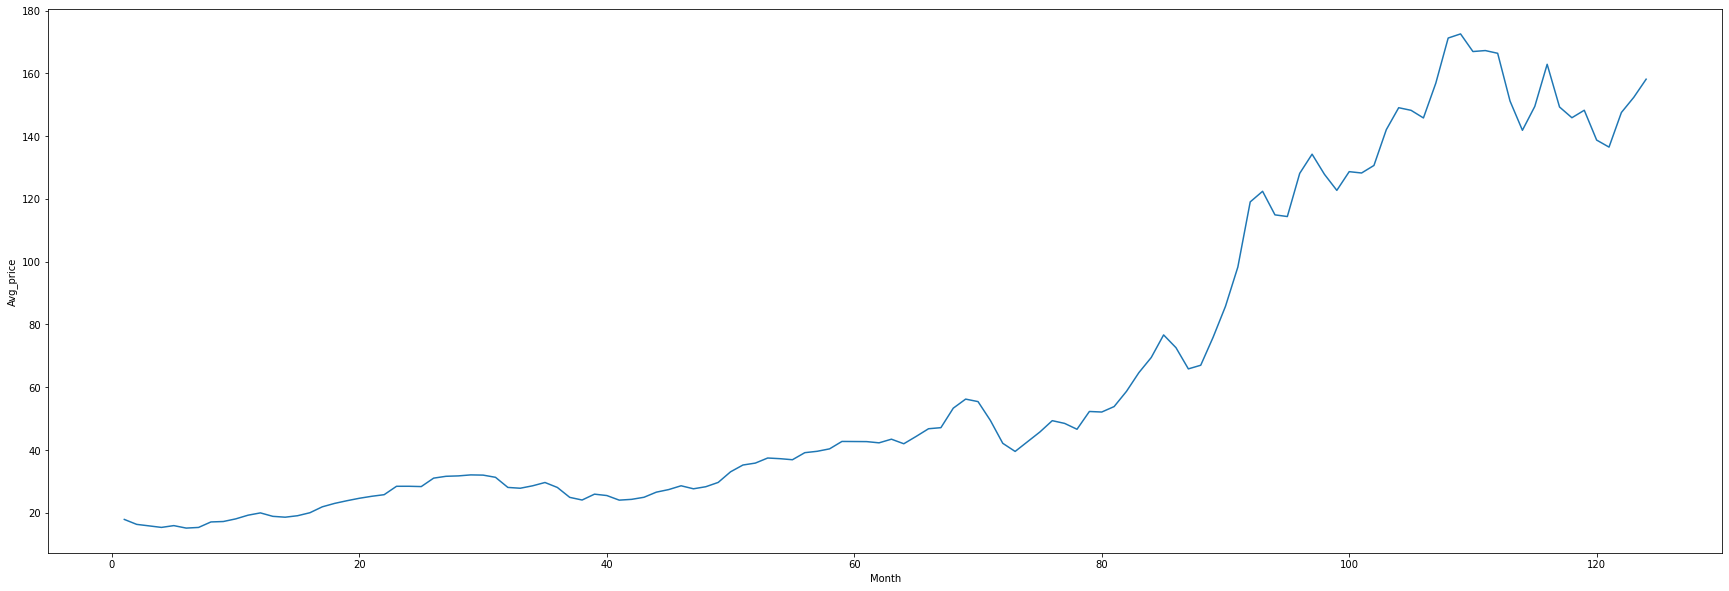

In [14]:
plt.figure(figsize=(30,10))
sns.lineplot(x="Month", y="Avg_price", data=df_monthly)
plt.show()

# Monthly Data Pre-processing 

In [15]:
df_monthly_array=np.asarray(df_monthly)
df_monthly_array

array([[1, '2013-01-01', 19.779285, ..., 13.968525, 13123423600,
        17.85098175],
       [2, '2013-02-01', 16.396786, ..., 13.536427, 9344034000,
        16.277768],
       [3, '2013-03-01', 15.642857, ..., 13.654184, 9176876800,
        15.800089750000001],
       ...,
       [122, '2023-02-01', 143.970001, ..., 147.185272, 1307198900,
        147.52000425],
       [123, '2023-03-01', 146.830002, ..., 159.279999, 1049543200,
        152.35249725],
       [124, '2023-03-21', 157.320007, ..., 159.279999, 73938285,
        158.13499825]], dtype=object)

In [16]:
# rough work start

In [17]:
#v=[1,2,3,4]
#w=[5,6,7,8]
#x=[9,10,11,12]
#y=[13,14,15,16]
#z=np.asarray([v,w,x,y])
#z

In [18]:
#z.T

In [19]:
#z_0=z[0:4,0]
#z_1=z[0:4,1]
#z_2=z[0:4,2]
#z_3=z[0:4,3]
#z_0

In [20]:
#z_4=np.asarray([z_0,z_1,z_2,z_3])
#z_4

In [21]:
#z_4.T

In [22]:
# rough work end

In [23]:
X_train=np.atleast_2d(df_monthly_array[0:124,0]).T
X_train

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [

In [24]:
Y_train=df_monthly_array[0:124,8].T
Y_train

array([17.85098175, 16.277768, 15.800089750000001, 15.312767749999999,
       15.8825, 15.09428575, 15.301606749999998, 17.053304, 17.18741075,
       18.02392825, 19.20357175, 19.93714275, 18.8395535,
       18.565535999999998, 19.0354465, 19.987589, 21.870535250000003,
       22.967143500000002, 23.820625, 24.598750000000003, 25.2306245,
       25.73812475, 28.41375, 28.41874975, 28.32375, 31.01187625,
       31.59937475, 31.725624500000002, 32.044375, 31.97375025,
       31.274375250000002, 28.05187525, 27.793750250000002, 28.56874975,
       29.6200005, 28.04312525, 24.886874749999997, 24.04, 25.90499975,
       25.46375, 24.001875249999998, 24.25062475, 24.91375025, 26.5462505,
       27.36875025, 28.57625025, 27.6143745, 28.27875, 29.64687575,
       33.03187525, 35.1937505, 35.80500025, 37.42375, 37.21062475,
       36.8756255, 39.126875999999996, 39.5637505, 40.33812425,
       42.7025005, 42.67749975, 42.649375, 42.25937475, 43.42249975,
       41.96687525, 44.3075, 46.7518747

In [25]:
X_test=np.atleast_2d(np.linspace(0,140,1400)).T
print(X_test)

[[0.00000000e+00]
 [1.00071480e-01]
 [2.00142959e-01]
 ...
 [1.39799857e+02]
 [1.39899929e+02]
 [1.40000000e+02]]


In [26]:
X_train_new,X_test_new,Y_train_new,Y_test_new=train_test_split(X_train,Y_train,test_size=0.3)

# Kernel formation

In [27]:
kernel_1=C()*Mt(nu=1.5)+ExpSS(length_scale=10, periodicity=6)
kernel_2=C()*Mt(nu=2.5)
kernel_3=C()*RBF(length_scale=100)
C_1=C()
C_2=C()
kernel_4=C()*ExpSS(length_scale=10, periodicity=10)+C()*RBF(length_scale=10)
kernel_5=C_1*ExpSS(length_scale=10, periodicity=10)+C_2*RBF(length_scale=10)
kernel_6=C()*ExpSS(length_scale=10, periodicity=6)+RBF(length_scale=100)
kernel_7=C()*Mt(nu=1.5)+RBF(length_scale=100)

# GPR for monthly future prediction

In [28]:
gp=GaussianProcessRegressor(kernel=kernel_4, n_restarts_optimizer=100, random_state=1)

In [29]:
gp.fit(X_train,Y_train)

GaussianProcessRegressor(kernel=1**2 * ExpSineSquared(length_scale=10, periodicity=10) + 1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=100, random_state=1)

In [30]:
Y_pred,sigma=gp.predict(X_test, return_std=True)

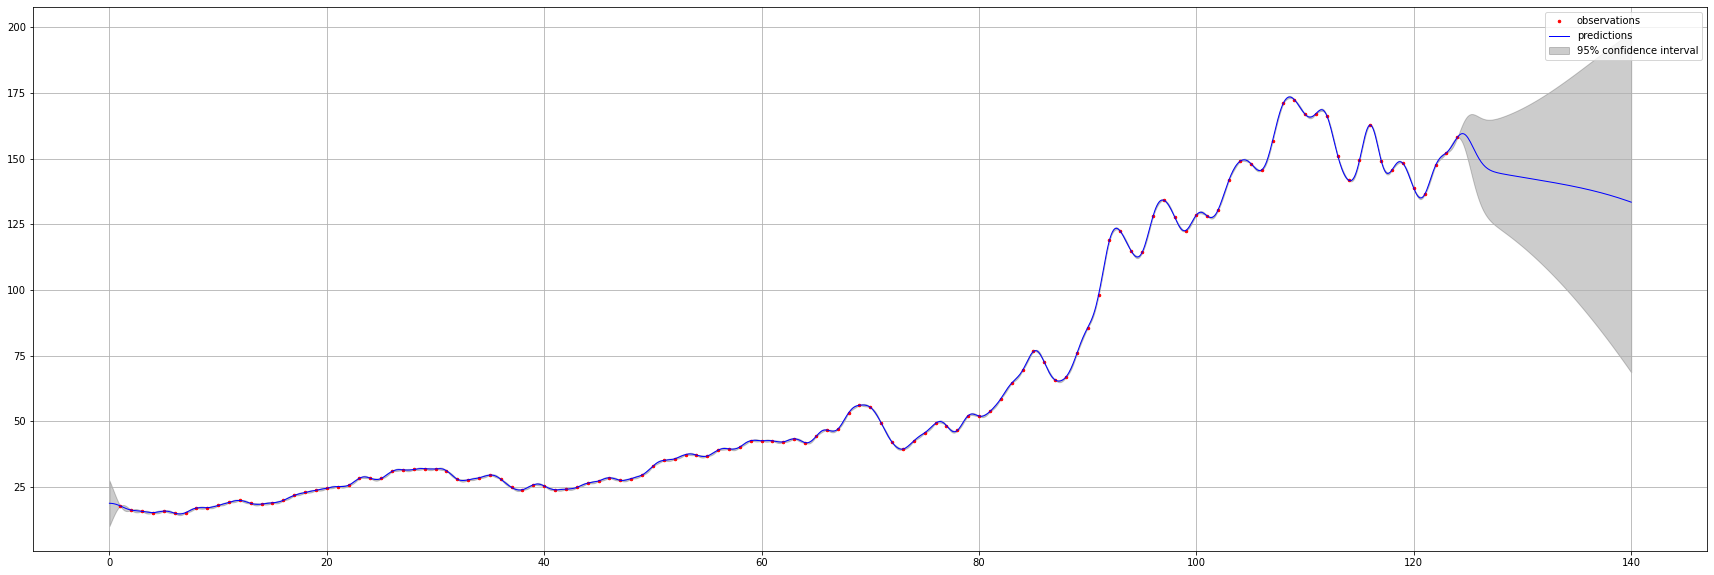

In [31]:
plt.figure(figsize=(30,10))
plt.plot(X_train, Y_train, 'r.', markersize=5, label=u'observations')
plt.plot(X_test[:,0], Y_pred, 'b-', linewidth=1, label=u'predictions')
plt.fill_between(X_test[:,0], Y_pred - 1.96*sigma, Y_pred + 1.96*sigma, alpha=0.2, color='k', label=u'95% confidence interval')
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

# GPR for missing monthly data prediction

In [32]:
X_test

array([[0.00000000e+00],
       [1.00071480e-01],
       [2.00142959e-01],
       ...,
       [1.39799857e+02],
       [1.39899929e+02],
       [1.40000000e+02]])

In [33]:
X_test_modified=[]
for i in X_test:
    #print(float(i))
    X_test_modified.append([round(float(i), 1)])
X_test_modified=np.array(X_test_modified)
for i in X_test_modified:
    print(i)

[0.]
[0.1]
[0.2]
[0.3]
[0.4]
[0.5]
[0.6]
[0.7]
[0.8]
[0.9]
[1.]
[1.1]
[1.2]
[1.3]
[1.4]
[1.5]
[1.6]
[1.7]
[1.8]
[1.9]
[2.]
[2.1]
[2.2]
[2.3]
[2.4]
[2.5]
[2.6]
[2.7]
[2.8]
[2.9]
[3.]
[3.1]
[3.2]
[3.3]
[3.4]
[3.5]
[3.6]
[3.7]
[3.8]
[3.9]
[4.]
[4.1]
[4.2]
[4.3]
[4.4]
[4.5]
[4.6]
[4.7]
[4.8]
[4.9]
[5.]
[5.1]
[5.2]
[5.3]
[5.4]
[5.5]
[5.6]
[5.7]
[5.8]
[5.9]
[6.]
[6.1]
[6.2]
[6.3]
[6.4]
[6.5]
[6.6]
[6.7]
[6.8]
[6.9]
[7.]
[7.1]
[7.2]
[7.3]
[7.4]
[7.5]
[7.6]
[7.7]
[7.8]
[7.9]
[8.]
[8.1]
[8.2]
[8.3]
[8.4]
[8.5]
[8.6]
[8.7]
[8.8]
[8.9]
[9.]
[9.1]
[9.2]
[9.3]
[9.4]
[9.5]
[9.6]
[9.7]
[9.8]
[9.9]
[10.]
[10.1]
[10.2]
[10.3]
[10.4]
[10.5]
[10.6]
[10.7]
[10.8]
[10.9]
[11.]
[11.1]
[11.2]
[11.3]
[11.4]
[11.5]
[11.6]
[11.7]
[11.8]
[11.9]
[12.]
[12.1]
[12.2]
[12.3]
[12.4]
[12.5]
[12.6]
[12.7]
[12.8]
[12.9]
[13.]
[13.1]
[13.2]
[13.3]
[13.4]
[13.5]
[13.6]
[13.7]
[13.8]
[13.9]
[14.]
[14.1]
[14.2]
[14.3]
[14.4]
[14.5]
[14.6]
[14.7]
[14.8]
[14.9]
[15.]
[15.1]
[15.2]
[15.3]
[15.4]
[15.5]
[15.6]
[15.7]
[15.8]
[15

In [34]:
gp_1=GaussianProcessRegressor(kernel=kernel_1, n_restarts_optimizer=100, random_state=2 )
gp_1.fit(X_train_new,Y_train_new)

GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=1.5) + ExpSineSquared(length_scale=10, periodicity=6),
                         n_restarts_optimizer=100, random_state=2)

In [35]:
Y_pred_1,sigma_1=gp_1.predict(X_test_modified, return_std=True)

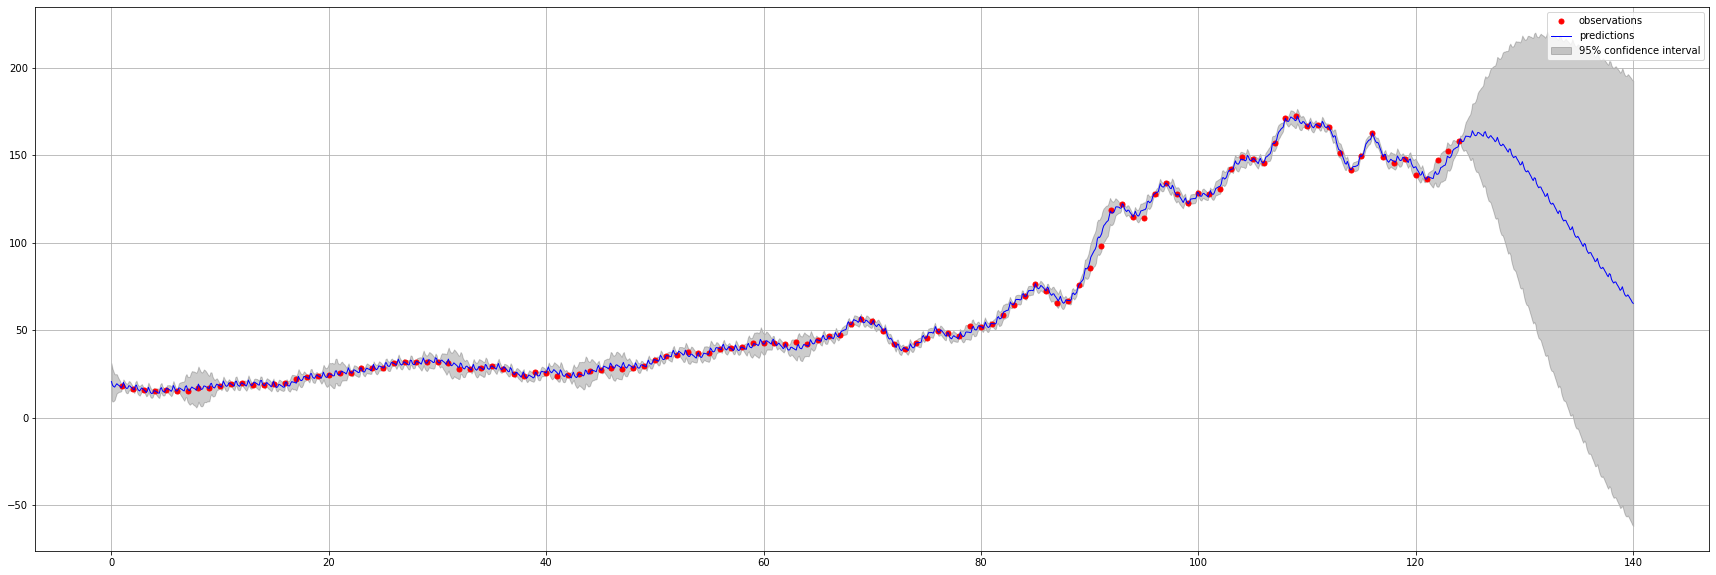

In [36]:
plt.figure(figsize=(30,10))
plt.plot(X_train, Y_train, 'r.', markersize=10, label=u'observations')
plt.plot(X_test_modified[:,0], Y_pred_1, 'b-', linewidth=1, label=u'predictions')
plt.fill_between(X_test[:,0], Y_pred_1 - 1.96*sigma_1, Y_pred_1 + 1.96*sigma_1, alpha=0.2, color='k', label=u'95% confidence interval')
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

In [37]:
Y_pred_modified=[]
for i in X_test_new:
    if i in X_test_modified:
        temp=list(X_test_modified).index(i)
        Y_pred_modified.append(Y_pred_1[temp])
Y_pred_modified

[24.42620220860124,
 38.65864153385246,
 117.22415386258831,
 41.981111469072175,
 156.8072089145021,
 152.99982056033514,
 25.15579936926804,
 147.76182456324506,
 30.368021255693293,
 16.22293573765546,
 149.18302644995129,
 170.25607812744556,
 67.84637487300938,
 118.95622688749586,
 139.2473331733445,
 88.91103647342243,
 25.691276142455536,
 19.149483946500595,
 30.338603848894763,
 48.58262115265052,
 31.02020408329372,
 103.94680149749729,
 132.38255494403245,
 25.10923188326518,
 143.56633143604358,
 127.2241323716255,
 16.636933957221117,
 59.22021914827519,
 33.47335503761019,
 41.269868282708785,
 25.154378099906353,
 37.046821197811994,
 28.415969850539568,
 35.64898431337889,
 28.819401844325284,
 19.66635169622966,
 41.22809251355011,
 146.68199386698325]

In [38]:
Y_test_new

array([25.2306245, 43.42249975, 119.03312299999999, 42.67749975,
       156.86750024999998, 151.16, 26.5462505, 149.045002, 28.57625025,
       15.301606749999998, 152.35249725, 172.56249999999997, 65.8237495,
       114.36750049999999, 147.52000425, 85.758749, 24.001875249999998,
       17.053304, 27.6143745, 52.249374499999995, 32.044375,
       98.27499974999999, 130.6450025, 24.598750000000003, 138.73250025,
       127.82000149999999, 17.18741075, 58.6693755, 31.274375250000002,
       42.7025005, 24.91375025, 36.8756255, 28.56874975, 37.42375,
       28.05187525, 21.870535250000003, 41.96687525, 145.85499950000002],
      dtype=object)

In [39]:
mse = MSE(Y_test_new, Y_pred_modified)
print(mse**0.5)

2.629681526221932


# Predicticting more recent monthly data

In [40]:
X_train=np.atleast_2d(df_monthly_array[100:122,0]).T
X_whole=np.atleast_2d(df_monthly_array[100:124,0]).T
X_train

array([[101],
       [102],
       [103],
       [104],
       [105],
       [106],
       [107],
       [108],
       [109],
       [110],
       [111],
       [112],
       [113],
       [114],
       [115],
       [116],
       [117],
       [118],
       [119],
       [120],
       [121],
       [122]], dtype=object)

In [41]:
Y_train=df_monthly_array[100:122,8].T
Y_whole=df_monthly_array[100:124,8].T
print(Y_train)
print(Y_whole)

[128.24250025 130.6450025 142.0550005 149.045002 148.21500025 145.78499975
 156.86750024999998 171.24500275 172.56249999999997 166.944996
 167.25500125000002 166.38750075 151.16 141.84999825 149.45999925
 162.87999725 149.27499775 145.85499950000002 148.23500074999998
 138.73250025 136.49249650000002 147.52000425]
[128.24250025 130.6450025 142.0550005 149.045002 148.21500025 145.78499975
 156.86750024999998 171.24500275 172.56249999999997 166.944996
 167.25500125000002 166.38750075 151.16 141.84999825 149.45999925
 162.87999725 149.27499775 145.85499950000002 148.23500074999998
 138.73250025 136.49249650000002 147.52000425 152.35249725 158.13499825]


In [42]:
y_mean=Y_train.mean()
print(y_mean)

150.75954545454545


In [43]:
for i in range(len(Y_train)):
    Y_train[i]=Y_train[i]-y_mean
print(Y_train)

[-22.51704520454544 -20.114542954545442 -8.70454495454544
 -1.714543454545435 -2.544545204545443 -4.974545704545449
 6.107954795454532 20.48545729545455 21.802954545454526 16.185450545454557
 16.495455795454575 15.62795529545454 0.4004545454545507
 -8.909547204545447 -1.299546204545436 12.120451795454557
 -1.4845477045454345 -4.904545954545426 -2.5245447045454625
 -12.027045204545459 -14.26704895454543 -3.2395412045454464]


In [44]:
X_test=np.atleast_2d(np.linspace(100,124,240)).T
X_test

array([[100.        ],
       [100.10041841],
       [100.20083682],
       [100.30125523],
       [100.40167364],
       [100.50209205],
       [100.60251046],
       [100.70292887],
       [100.80334728],
       [100.90376569],
       [101.0041841 ],
       [101.10460251],
       [101.20502092],
       [101.30543933],
       [101.40585774],
       [101.50627615],
       [101.60669456],
       [101.70711297],
       [101.80753138],
       [101.90794979],
       [102.0083682 ],
       [102.10878661],
       [102.20920502],
       [102.30962343],
       [102.41004184],
       [102.51046025],
       [102.61087866],
       [102.71129707],
       [102.81171548],
       [102.91213389],
       [103.0125523 ],
       [103.11297071],
       [103.21338912],
       [103.31380753],
       [103.41422594],
       [103.51464435],
       [103.61506276],
       [103.71548117],
       [103.81589958],
       [103.91631799],
       [104.0167364 ],
       [104.11715481],
       [104.21757322],
       [104

In [45]:
X_test_modified=[]
for i in X_test:
    #print(float(i))
    X_test_modified.append([round(float(i), 1)])
X_test_modified=np.array(X_test_modified)
for i in X_test_modified:
    print(i)

[100.]
[100.1]
[100.2]
[100.3]
[100.4]
[100.5]
[100.6]
[100.7]
[100.8]
[100.9]
[101.]
[101.1]
[101.2]
[101.3]
[101.4]
[101.5]
[101.6]
[101.7]
[101.8]
[101.9]
[102.]
[102.1]
[102.2]
[102.3]
[102.4]
[102.5]
[102.6]
[102.7]
[102.8]
[102.9]
[103.]
[103.1]
[103.2]
[103.3]
[103.4]
[103.5]
[103.6]
[103.7]
[103.8]
[103.9]
[104.]
[104.1]
[104.2]
[104.3]
[104.4]
[104.5]
[104.6]
[104.7]
[104.8]
[104.9]
[105.]
[105.1]
[105.2]
[105.3]
[105.4]
[105.5]
[105.6]
[105.7]
[105.8]
[105.9]
[106.]
[106.1]
[106.2]
[106.3]
[106.4]
[106.5]
[106.6]
[106.7]
[106.8]
[106.9]
[107.]
[107.1]
[107.2]
[107.3]
[107.4]
[107.5]
[107.6]
[107.7]
[107.8]
[107.9]
[108.]
[108.1]
[108.2]
[108.3]
[108.4]
[108.5]
[108.6]
[108.7]
[108.8]
[108.9]
[109.]
[109.1]
[109.2]
[109.3]
[109.4]
[109.5]
[109.6]
[109.7]
[109.8]
[109.9]
[110.]
[110.1]
[110.2]
[110.3]
[110.4]
[110.5]
[110.6]
[110.7]
[110.8]
[110.9]
[111.]
[111.1]
[111.2]
[111.3]
[111.4]
[111.5]
[111.6]
[111.7]
[111.8]
[111.9]
[112.1]
[112.2]
[112.3]
[112.4]
[112.5]
[112.6]
[112

In [46]:
gp_2=GaussianProcessRegressor(kernel=kernel_7, n_restarts_optimizer=100, random_state=2 )
gp_2.fit(X_train,Y_train)

GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=1.5) + RBF(length_scale=100),
                         n_restarts_optimizer=100, random_state=2)

In [47]:
Y_pred_2,sigma_2=gp_2.predict(X_test_modified, return_std=True)

In [48]:
print(Y_pred_2)

[-16.63227736 -17.34207541 -18.04762947 -18.74261789 -19.41964375
 -20.07009842 -20.68400976 -21.24987323 -21.75446388 -22.18262702
 -22.5170452  -22.74300349 -22.86326049 -22.88299507 -22.8048563
 -22.62900668 -22.3531339  -21.97243116 -21.47954548 -20.86449338
 -20.11454295 -19.22217403 -18.20936592 -17.10358586 -15.93010858
 -14.7124212  -13.47260542 -12.23170155 -11.01005908  -9.82767796
  -8.70454495  -7.65714565  -6.68726758  -5.79355442  -4.97535544
  -4.23275909  -3.5666343   -2.9786798   -2.47148169  -2.04857984
  -1.71454345  -1.47256892  -1.31707048  -1.24108203  -1.23865194
  -1.3047605   -1.43524716  -1.6267472   -1.87663767  -2.18299229
  -2.5445452   -2.95657348  -3.39853826  -3.84606469  -4.27467631
  -4.65943933  -4.97460245  -5.19322803  -5.2868097   -5.2248718
  -4.9745457   -4.51107817  -3.85041334  -3.01653632  -2.03088915
  -0.91271631   0.3206165    1.65332678   3.07093908   4.56002484
   6.1079548    7.70111087   9.31997801  10.9434583   12.55005728
  14.1175141

In [49]:
for i in range(len(Y_pred_2)):
    Y_pred_2[i]=Y_pred_2[i]+y_mean
print(Y_pred_2)

[134.1272681  133.41747004 132.71191599 132.01692757 131.33990171
 130.68944704 130.0755357  129.50967222 129.00508158 128.57691843
 128.24250025 128.01654196 127.89628496 127.87655039 127.95468915
 128.13053877 128.40641155 128.7871143  129.27999998 129.89505208
 130.6450025  131.53737143 132.55017953 133.65595959 134.82943688
 136.04712426 137.28694004 138.5278439  139.74948638 140.9318675
 142.0550005  143.10239981 144.07227787 144.96599104 145.78419002
 146.52678637 147.19291115 147.78086565 148.28806376 148.71096562
 149.045002   149.28697654 149.44247498 149.51846342 149.52089351
 149.45478495 149.3242983  149.13279825 148.88290778 148.57655317
 148.21500025 147.80297197 147.3610072  146.91348077 146.48486914
 146.10010613 145.78494301 145.56631743 145.47273576 145.53467366
 145.78499975 146.24846729 146.90913212 147.74300913 148.72865631
 149.84682914 151.08016195 152.41287223 153.83048453 155.31957029
 156.86750025 158.46065632 160.07952346 161.70300376 163.30960273
 164.877059

In [50]:
for i in range(len(Y_whole)-2):
    Y_whole[i]=Y_whole[i]+y_mean
print(Y_whole)

[128.24250025 130.6450025 142.0550005 149.045002 148.21500025 145.78499975
 156.86750024999998 171.24500275 172.56249999999997 166.944996
 167.25500125000002 166.38750075 151.16 141.84999825 149.45999925
 162.87999725 149.27499775 145.85499950000002 148.23500074999998
 138.73250025 136.49249650000002 147.52000425 152.35249725 158.13499825]


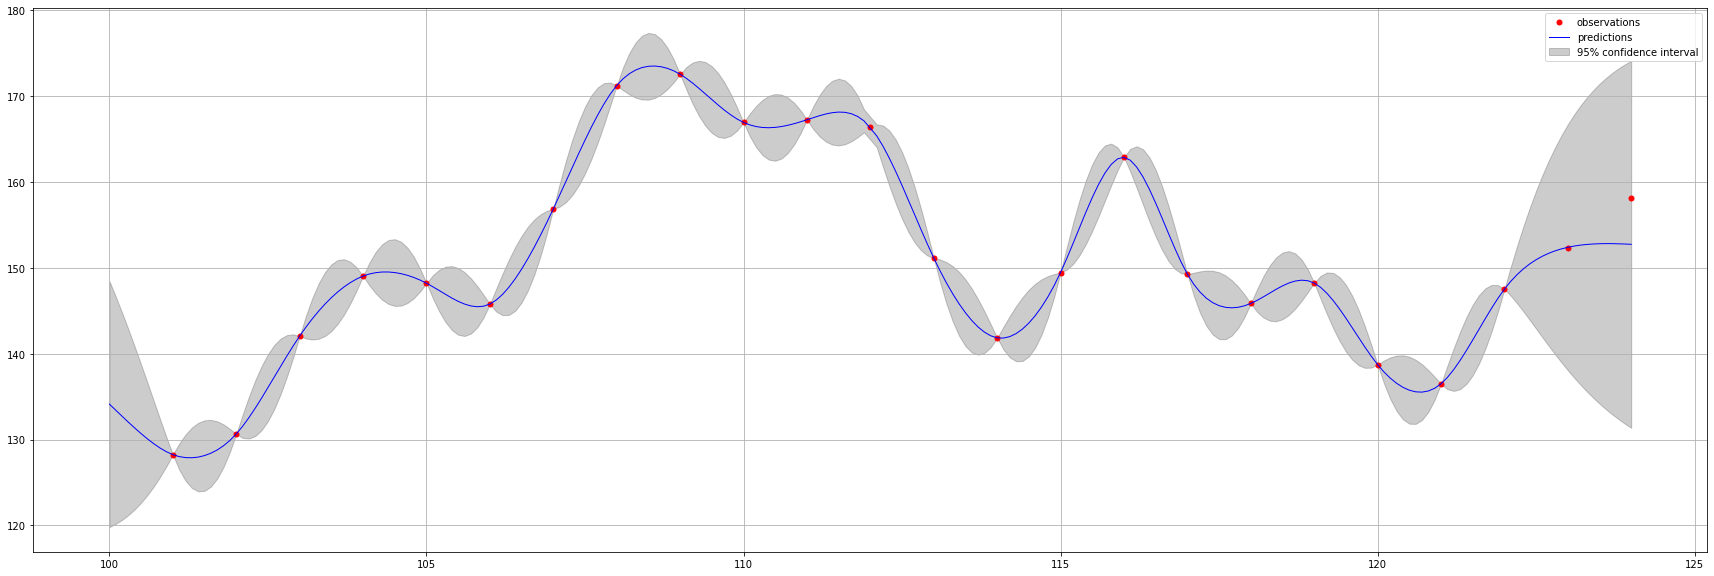

In [51]:
plt.figure(figsize=(30,10))
plt.plot(X_whole, Y_whole, 'r.', markersize=10, label=u'observations')
plt.plot(X_test_modified[:,0], Y_pred_2, 'b-', linewidth=1, label=u'predictions')
plt.fill_between(X_test_modified[:,0], Y_pred_2 - 1.96*sigma_2, Y_pred_2 + 1.96*sigma_2, alpha=0.2, color='k', label=u'95% confidence interval')
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

In [52]:
print(gp_2.kernel_.get_params())

{'k1': 12.8**2 * Matern(length_scale=2.06, nu=1.5), 'k2': RBF(length_scale=1.03), 'k1__k1': 12.8**2, 'k1__k2': Matern(length_scale=2.06, nu=1.5), 'k1__k1__constant_value': 164.84501592833016, 'k1__k1__constant_value_bounds': (1e-05, 100000.0), 'k1__k2__length_scale': 2.056756388916465, 'k1__k2__length_scale_bounds': (1e-05, 100000.0), 'k1__k2__nu': 1.5, 'k2__length_scale': 1.029058220830471, 'k2__length_scale_bounds': (1e-05, 100000.0)}


In [53]:
X_test_new=np.atleast_2d(df_monthly_array[122:124,0]).T
Y_test_new=df_monthly_array[122:124,8].T

In [54]:
Y_pred_modified=[]
for i in X_test_new:
    temp=list(X_test_modified).index(i)
    Y_pred_modified.append(Y_pred_2[temp])
Y_pred_modified

[152.39778685800624, 152.74400536099648]

In [55]:
mse = MSE(Y_test_new, Y_pred_modified)
print(mse**0.5)

3.812142145689206


In [56]:
error=[]
for i in range(2):
    error.append(Y_test_new[i]-Y_pred_modified[i])
print(error)

[-0.04528960800624304, 5.390992889003513]


In [58]:
for i in range (len(error)):
    error[i]=np.abs(error[i])
sum=0
for i in range (len(error)):
    sum=sum+error[i]
MAD=sum/len(error)
print('Mean absolute deviation =', MAD)

Mean absolute deviation = 2.718141248504878
